In [1]:
import pandas as pd 
import numpy as np
data = pd.read_csv('skroutz_refrigerators.csv')
data.head()

,27457,whirlpool blf8121ox,2376,3016,Whirlpool Ψυγειοκαταψύκτης Inox A+ BLF 8121 OX,927,Refrigerators
0,27458,whirlpool blf 8121 ox psigiokatapsiktis,1306,3016,Whirlpool Ψυγειοκαταψύκτης Inox A+ BLF 8121 OX,927,Refrigerators
1,27459,psigiokatapsiktis eleftheros whirlpool blf 812...,2870,3016,Whirlpool Ψυγειοκαταψύκτης Inox A+ BLF 8121 OX,927,Refrigerators
2,27460,psigiokatapsiktis eleftheros whirlpool blf 812...,4744,3016,Whirlpool Ψυγειοκαταψύκτης Inox A+ BLF 8121 OX,927,Refrigerators
3,27461,psigiokatapsiktis whirlpool blf 8121ox inox,4599,3016,Whirlpool Ψυγειοκαταψύκτης Inox A+ BLF 8121 OX,927,Refrigerators
4,27462,whirlpool psigiokatapsiktis blf 8121 ox a,649,3016,Whirlpool Ψυγειοκαταψύκτης Inox A+ BLF 8121 OX,927,Refrigerators


In [2]:
data = data.drop(['27457', 'Refrigerators', '927'],1 )
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)
data.head()


,whirlpool blf8121ox,2376,3016,Whirlpool Ψυγειοκαταψύκτης Inox A+ BLF 8121 OX
0,10732,30,0,869
1,8285,107,0,869
2,8285,146,0,869
3,9175,144,0,869
4,10895,11,0,869


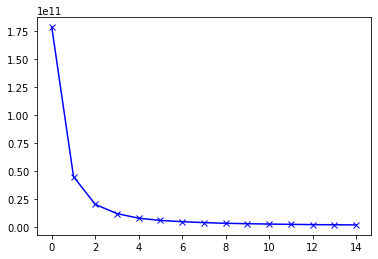

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 16):
    kmeans = KMeans(i, n_init=15)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, 'bx-')
plt.show()


In [5]:
kmeans = KMeans(3)
Y_kmeans = kmeans.fit_predict(data)


from sklearn.decomposition import PCA
pca = PCA(2)
x = pca.fit_transform(data)

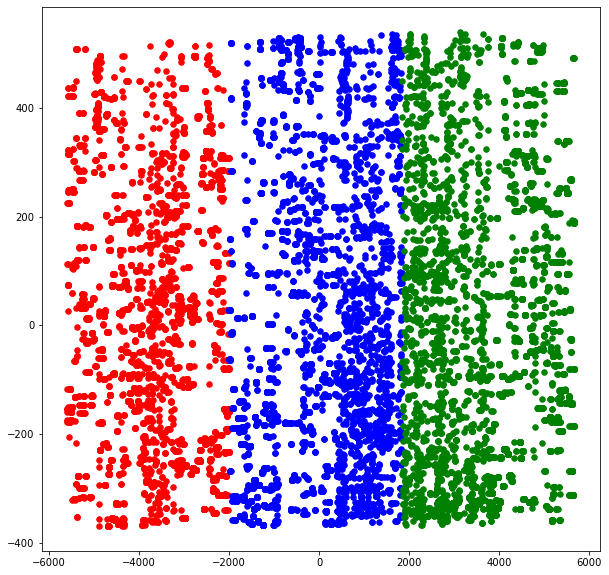

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(x[Y_kmeans==0, 0], x[Y_kmeans==0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(x[Y_kmeans==1, 0], x[Y_kmeans==1, 1], s=30, c='blue', label='Cluster 2')
plt.scatter(x[Y_kmeans==2, 0], x[Y_kmeans==2, 1], s=30, c='green', label='Cluster 3')
plt.show()